<tr>
    <td> <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="40%" height="40%" align='left' /> </td>
    <td> <img src="https://pbs.twimg.com/profile_images/509039793225728001/G9EIJloB_400x400.jpeg" title="Title text" width="40%" height="40%" align='right'/> </td>
</tr>

<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="20%" height="20%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>
<h2 align='center'> Tarea 3</h2>

> - Cristian Chamorro Brant; 201673506-2
> - Eduardo Padilla Castillo; 201673571-2

<hr style="height:2px;border:none"/>




## Tratamiento de los datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row

df.keys()

df

,date,meantemp,humidity,wind_speed,meanpressure,y_value
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,7.400000
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,7.166667
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,8.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,6.000000
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.000000
...,...,...,...,...,...,...
1456,2016-12-27,16.850000,67.550000,8.335000,1017.200000,17.217391
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,15.238095
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,14.095238
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.052632


In [2]:
...#procesamiento de fecha(datetime/timestamp) a numeros

df['date'] = pd.to_datetime(df['date'])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
...#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
... #any more information?
df.drop(["date"], axis=1, inplace=True) #delete date

df

,meantemp,humidity,wind_speed,meanpressure,y_value,cday,year,month,season_fall,season_rainy,season_summer,season_winter
0,10.000000,84.500000,0.000000,1015.666667,7.400000,1,2013,1,0,0,0,1
1,7.400000,92.000000,2.980000,1017.800000,7.166667,2,2013,1,0,0,0,1
2,7.166667,87.000000,4.633333,1018.666667,8.666667,3,2013,1,0,0,0,1
3,8.666667,71.333333,1.233333,1017.166667,6.000000,4,2013,1,0,0,0,1
4,6.000000,86.833333,3.700000,1016.500000,7.000000,5,2013,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,16.850000,67.550000,8.335000,1017.200000,17.217391,1,2016,12,0,0,0,1
1457,17.217391,68.043478,3.547826,1015.565217,15.238095,2,2016,12,0,0,0,1
1458,15.238095,87.857143,6.000000,1016.904762,14.095238,3,2016,12,0,0,0,1
1459,14.095238,89.666667,6.266667,1017.904762,15.052632,4,2016,12,0,0,0,1


## Creación conjuntos de entrenamiento y validación

In [3]:
y = df.pop('y_value').values
X = df.values 
X_train = X[:1000]
y_train = y[:1000]
X_val = X[1000:]
y_val = y[1000:]
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0) #shuffle values on train only

## Desarrollo Parte 1

a) Describa el problema trabajado, la cantidad de datos que se cuenta como las características a trabajar. Al ser datos temporales podría ayudar una ilustración gráfica de la secuencias trabajadas y su comportamiento ¿Es válido el uso de la información sólo del día anterior?.

El problema trata acerca del clima durante los dias del 2013 al 2016, siendo 1461 dias exactamente. Para cada dia se tienen los datos de temperatura, humedad, velocidad del viento y la presion (todas siendo el promedio diario). Para poder realizar un mejor analisis tambien se considerara las estaciones del año en las cuales se vivio tal dia. A continuacion se representan los datos ya mencionados anteriormente, pero separados por año con un grafico respectivo.

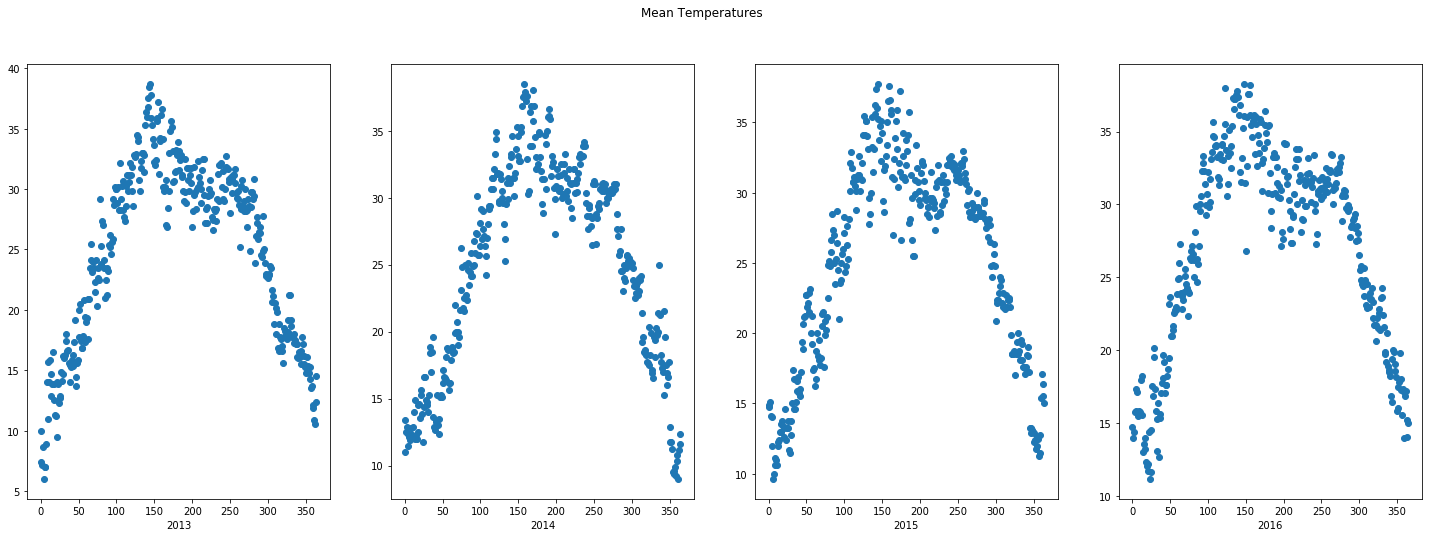

In [4]:
df_2013 = df.loc[df['year'] == 2013].copy()
df_2014 = df.loc[df['year'] == 2014].copy()
df_2015 = df.loc[df['year'] == 2015].copy()
df_2016 = df.loc[df['year'] == 2016].copy()

meantemps = {
    2013: df_2013['meantemp'],
    2014: df_2014['meantemp'],
    2015: df_2015['meantemp'],
    2016: df_2016['meantemp']
}

humidity = {
    2013: df_2013['humidity'],
    2014: df_2014['humidity'],
    2015: df_2015['humidity'],
    2016: df_2016['humidity']
}

meanpressure = {
    2013: df_2013['meanpressure'],
    2014: df_2014['meanpressure'],
    2015: df_2015['meanpressure'],
    2016: df_2016['meanpressure']
}

values = [meantemps[2013], meantemps[2014], meantemps[2015], meantemps[2016]]

plt.figure(figsize=(25, 8))

plt.subplot(141)
plt.xlabel('2013')
plt.scatter(range(365), values[0])
plt.subplot(142)
plt.xlabel('2014')
plt.scatter(range(365), values[1])
plt.subplot(143)
plt.xlabel('2015')
plt.scatter(range(365), values[2])
plt.subplot(144)
plt.xlabel('2016')
plt.scatter(range(366), values[3])
plt.suptitle('Mean Temperatures')
plt.show()

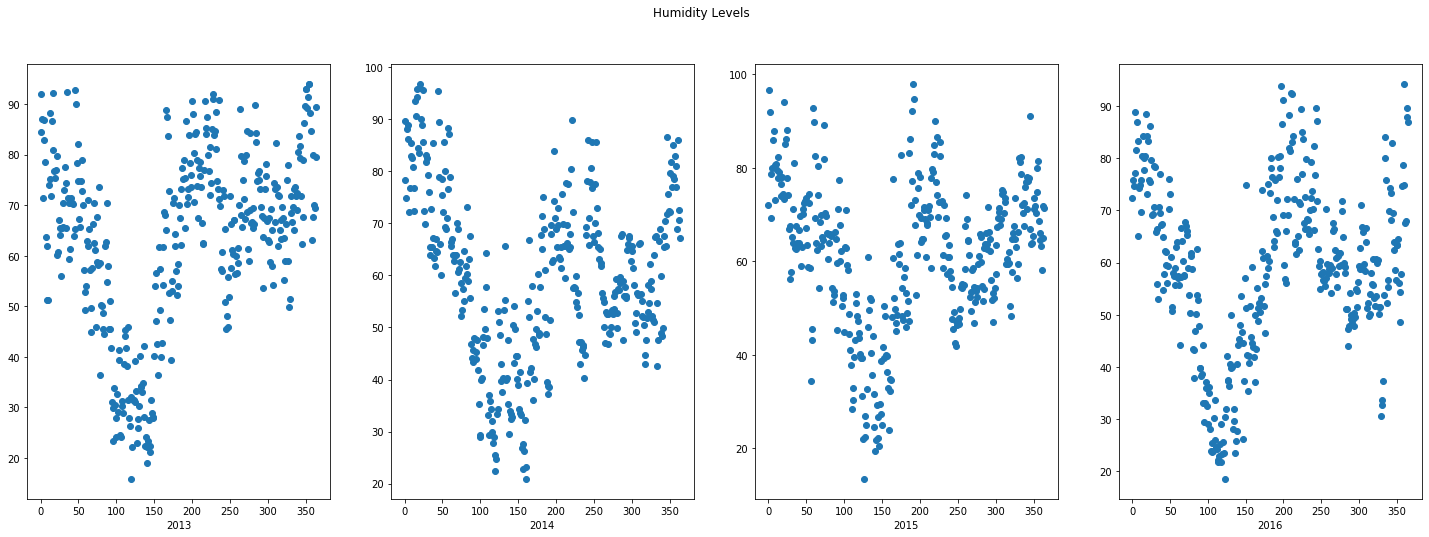

In [5]:
values = [humidity[2013], humidity[2014], humidity[2015], humidity[2016]]

plt.figure(figsize=(25, 8))

plt.subplot(141)
plt.xlabel('2013')
plt.scatter(range(365), values[0])
plt.subplot(142)
plt.xlabel('2014')
plt.scatter(range(365), values[1])
plt.subplot(143)
plt.xlabel('2015')
plt.scatter(range(365), values[2])
plt.subplot(144)
plt.xlabel('2016')
plt.scatter(range(366), values[3])
plt.suptitle('Humidity Levels')
plt.show()

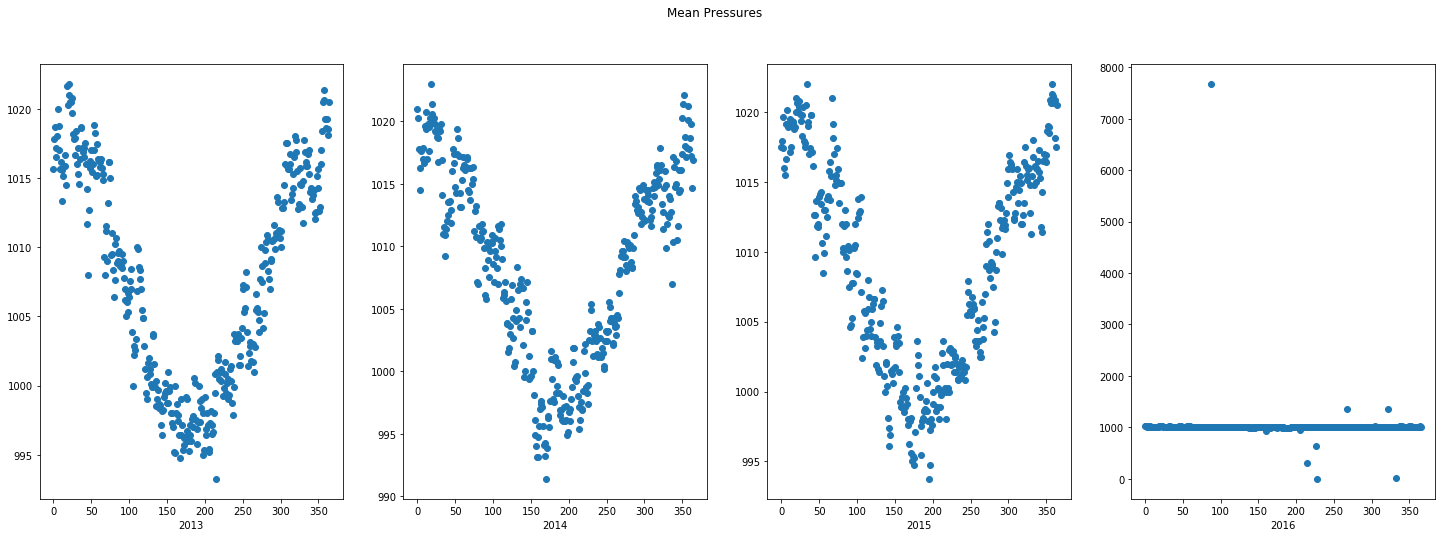

In [6]:
values = [meanpressure[2013], meanpressure[2014], meanpressure[2015], meanpressure[2016]]

plt.figure(figsize=(25, 8))

plt.subplot(141)
plt.xlabel('2013')
plt.scatter(range(365), values[0])
plt.subplot(142)
plt.xlabel('2014')
plt.scatter(range(365), values[1])
plt.subplot(143)
plt.xlabel('2015')
plt.scatter(range(365), values[2])
plt.subplot(144)
plt.xlabel('2016')
plt.scatter(range(366), values[3])
plt.suptitle('Mean Pressures')
plt.show()

### Dato mal etiquetado o solo es un outlayer ?

Decidimos dejar el dato tal cual estaba, debido a qué no tenemos la certeza de si fue mal etiquetado o efectivamente es un outlayer.

In [7]:
meanpressure[2016][1182]

7679.333333333332

b) Entrene un solo Árbol de Regresión de múltiples niveles para resolver el problema. Defina un Árbol no regularizado (como el que no tiene límites en su profundidad) y otro Árbol regularizado (variando los hiper-parámetros que prefiera, por ejemplo, los más comunes como la profundidad, el número mínimo de datos para realizar split o el número mínimo de datos en cada hoja). Además comente sobre la ventaja de usar un árbol de decisión respecto a la escala de los datos ¿Porqué no es necesario escalar los datos?

In [25]:
from sklearn.metrics import accuracy_score

def RMSE(ytrue,ypred):
    return np.sqrt(np.mean(np.square(ytrue - ypred)) )

from sklearn.tree import DecisionTreeRegressor as Tree
model_unr = Tree() #unregularized model -- default parameters
model_unr.fit(X_train,y_train)

model_r = Tree(max_depth = 200, min_samples_split = 20)
model_r.fit(X_train,y_train)

y_pred_unr = model_unr.predict(X_val)
y_pred_r = model_r.predict(X_val)


print("RMSE No Regularizado: ", RMSE(y_val, y_pred_unr))
print("Regularizado: ", RMSE(y_val, y_pred_r))

RMSE No Regularizado:  2.3691526076865705
Regularizado:  1.980054534825134


c) Para evaluar la calidad de predicción en este problema se utilizará la métrica Root Mean Squared Error (RMSE), indicando un error en la escala real de la temperatura. Como los datos de validación siguen con el orden temporal, visualice esa predicción a lo largo del tiempo. Comente sobre los resultados comparando la regularización vs el no regularizar.

RMSE train=  0.0
RMSE val=  2.3691526076865705


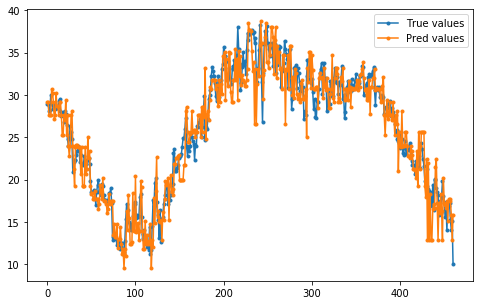

RMSE train=  1.183861477354968
RMSE val=  1.980054534825134


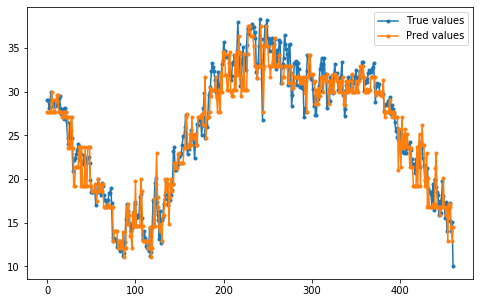

In [27]:
y_train_hat = model_unr.predict(X_train)
y_val_hat = model_unr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

y_train_hat = model_r.predict(X_train)
y_val_hat = model_r.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()



En primer lugar se presenta el grafico para el caso No regularizado, en donde basandose en los valores de RMSE se puede notar que a primera vista existe overfitting, dado que el RMSE train=  0.0 pero al momento de aplicar en el conjunto de test se obtiene RMSE val= 2.3691526076865705 

Por otra parte, en el caso de la regularizacion, se puede notar que a diferencia del no regularizado se presentan un RMSE de entrenamiento mayor con RMSE train=  1.183861477354968, pero al momento de aplicar al conjunto de validacion se obtiene un RMSE menor que en el caso no regularizado, con valor RMSE val= 1.980054534825134.

Determinando que se entrena mejor el modelo con un arbol de regresion regularizado.


d) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de Bagging, compare el Árbol no regularizado con el regularizado (seteando los hiper-parámetros en base a lo experimentado anteriormente en b)) ¿Qué debería suceder? ¿Se visualiza overfitting? Varíe la cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro.

RMSE train=  0.6562205988882691
RMSE val=  1.6891919027441675


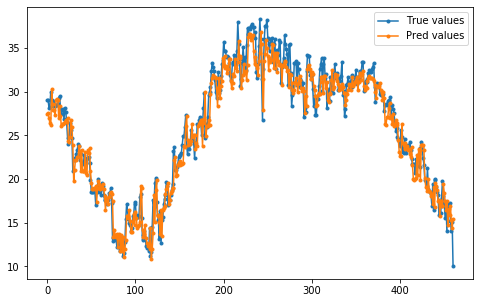

RMSE train=  1.2331811140513114
RMSE val=  1.5984923704682528


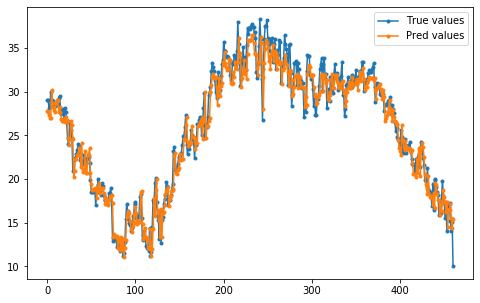

In [32]:
from sklearn.ensemble import BaggingRegressor
#No regularizado
BR_model_nr = BaggingRegressor(base_estimator=Tree(), n_estimators=50, n_jobs=-1)

BR_model_nr.fit(X_train,y_train)

y_train_hat_nr = BR_model_nr.predict(X_train)
y_val_hat_nr = BR_model_nr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat_nr))
print("RMSE val= ",RMSE(y_val,y_val_hat_nr))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat_nr, '.-' ,label="Pred values")
plt.legend()
plt.show()

#Regularizado
BR_model = BaggingRegressor(base_estimator=Tree(max_depth = 200, min_samples_split = 20), n_estimators=1000, n_jobs=-1)

BR_model.fit(X_train,y_train)

y_train_hat = BR_model.predict(X_train)
y_val_hat = BR_model.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()



Aplicando la tecnica de ensamblado de árboles de múltiples niveles llamada Bagging se utiliza, en primer lugar, una combinacion de arboles de regresion no regularizados, en donde se obtiene un valor de RMSE de entrenamiento de RMSE train=  0.6562205988882691, lo cual es bajo. Pero al momento de observar el RMSE con los datos de validacion se obtiene RMSE val=  1.6891919027441675.

De misma forma que en la pregunta anterior, el segundo grafico presentado representa los valores aplicando la tecnica Bagging, pero en este caso utilizando arboles de regresion regularizados. Con los datos de entrenamiento se obtiene un RMSE train=  1.2331811140513114, mayor que en el caso no regularizado, pero al ser aplicado en los datos de test se obtiene un valor RMSE val=  1.5984923704682528, el cual es menor que el caso anterior.

Se llega a la conclusion que es mejor aplicar la tecnica Bagging con arboles regularizados. Si se puede considerar overfitting en el caso de arboles no regularizados, pero con una tamaño menor que en la pregunta anterior.

e) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de AdaBoost, compare el Árbol no regularizado con el regularizado (seteando los hiper-parámetros en base a lo experimentado anteriormente en d) ¿Se visualiza overfitting? ¿Qué técnica utiliza la librería de sklearn, re-muestrear o pesar ejemplos? ¿Qué le parece más sensato?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

RMSE train=  0.0759997240119109
RMSE val=  1.7745898924109313


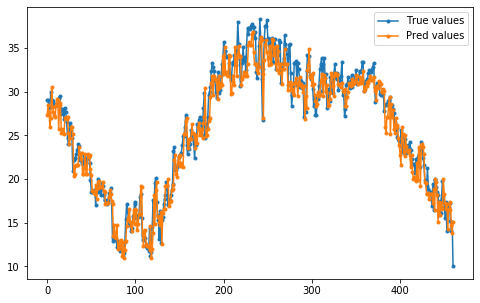

RMSE train=  0.7437863879738046
RMSE val=  1.7346562040764488


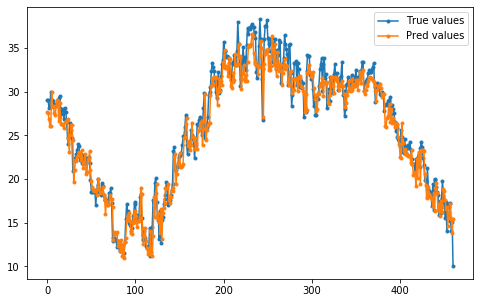

In [31]:
from sklearn.ensemble import AdaBoostRegressor
#No regularizado
AR_model_nr = AdaBoostRegressor(base_estimator= Tree(), n_estimators=50)

AR_model_nr.fit(X_train,y_train)

y_train_hat_nr = AR_model_nr.predict(X_train)
y_val_hat_nr = AR_model_nr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat_nr))
print("RMSE val= ",RMSE(y_val,y_val_hat_nr))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat_nr, '.-' ,label="Pred values")
plt.legend()
plt.show()

#Regularizado
AR_model = AdaBoostRegressor(base_estimator= Tree(max_depth = 200, min_samples_split = 20), n_estimators=1000)

AR_model.fit(X_train,y_train)

y_train_hat = AR_model.predict(X_train)
y_val_hat = AR_model.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()




En este caso se aplica otra tecnica llamada AdaBoost, en donde de misma forma que las preguntas anteriores se presenta, en primer lugar, la tecnica aplicada a arboles de regresion No regularizada, en donde se tiene un RMSE train=  0.0759997240119109 y un RMSE val=  1.77458989241093.

Para los arboles de regresion regularizados se presentan valores RMSE train=  0.7437863879738046 y RMSE val=  1.7346562040764488.

En conclusion, se obtiene un mejor resultado para el caso regularizado, en donde se presenta un overfitting para los no regularizados, pero con un valor menor que en C pero mayor que en D.


f) Pruebe otra técnica de ensamblado dedicada a árboles de decisión, que combina el muestreo boostrap de Bagging con muestreo sobre las features: Random Forest, compare el Árbol no regularizado con el regularizado ¿Se visualiza overfitting?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro.

RMSE train=  0.6428149249529899
RMSE val=  1.677208313961834


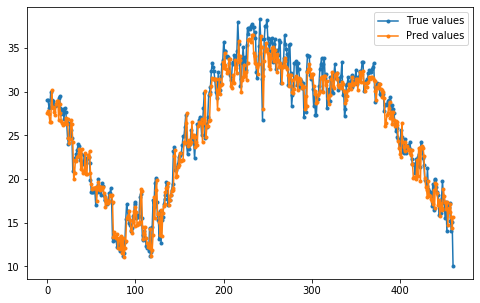

RMSE train=  1.2301148206419565
RMSE val=  1.599003223500408


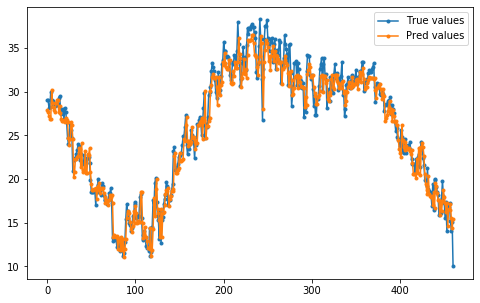

In [12]:
from sklearn.ensemble import RandomForestRegressor
RFR_model_unr = RandomForestRegressor(oob_score=True, n_estimators=1000, n_jobs=-1)

RFR_model_unr.fit(X_train,y_train)

y_train_hat = RFR_model_unr.predict(X_train)
y_val_hat = RFR_model_unr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()


RFR_model_r = RandomForestRegressor(oob_score=True, max_depth = 200, min_samples_split = 20, n_estimators=1000, n_jobs=-1)

RFR_model_r.fit(X_train,y_train)

y_train_hat = RFR_model_r.predict(X_train)
y_val_hat = RFR_model_r.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()


En este caso se utiliza la tecnica Random Forest, que combina el muestreo boostrap de Bagging con muestreo sobre las features. De misma forma que en las preguntas anteriores se presenta primero el caso para arboles de regresion no regularizados, en donde se obtiene RMSE train=  0.6428149249529899 y RMSE val=  1.677208313961834.

Para al caso de los arboles regularizados se obtiene RMSE train=  1.2301148206419565 y RMSE val=  1.599003223500408, valores muy similares a los obtenidos al aplicar Bagging.

Al igual que en las preguntas anteriores se obtiene mejor resultado al ser aplicado en los arboles regularizados.

g) Verifique que el OOB error (out of bag error) de los ensambladores que utilizan la técnica boostrap puede ser una alternativa como métrica de generalización, compare con el error calculado sobre el conjunto de validación (o en su defecto cross validation).

In [41]:
oob_error = RFR_model_unr.oob_score
val_error = RFR_model_unr.score(X_val,y_val)

print("OOB error: ",oob_error)
print ("Val error: ",val_error)
print('*' * 100)
    

OOB error:  True
Val error:  0.9439645238367613
****************************************************************************************************


> h) Defina otra forma de combinar los valores que entregan los ensamblados al hacer predicciones y compare con lo que se hace actualmente, por ejemplo *Bagging* realiza el voto de la mayoría para clasificación y promedio para regresión, *AdaBoost* realiza una combinación ponderada de cada clasificador dependiendo de su *habilidad* (desempeño para clasificar el conjunto de entrenamiento). Se puede inspirar desde clásicos estadísticos, como entregar el primer cuartíl ($Q_1$) si al ensamblado le cuesta predecir valores bajos, o el segundo cuartil ($Q_2$) o mediana para ser robusto a predicciones atípicas de modelos.  

In [42]:
def combine_predictions_quartile(predictions, quartile):
    prediction_list=[]
    predictions = zip(*predictions) 
    for prediction_group in predictions:
        #prediction_list.append(np.sum(prediction_group)/len(prediction_group)) #promedio aritmetico (default)
        
        prediction_list.append(np.percentile(prediction_group, quartile))
        
    return prediction_list

Esta funcion se utiliza para las distintas tecnicas, lo que hacemos es que, en vez de utilizar un promedio aritmético por ejemplo, obtenemos el percentil de cada muestra de respuestas que se adapta mejor a los datos trabajados.

In [54]:
list_estimators = AR_model.estimators_
list_predictions = [estimator.predict(X_val) for estimator in list_estimators]

RMSE_quartile = []

for i in range(1,100):
    new_predictions = combine_predictions_quartile(list_predictions, i)
    RMSE_quartile.append(RMSE(y_val, new_predictions))
    print(i, "RMSE val= ", RMSE(y_val, new_predictions))
    
print("Min RMSE_val para 'AR_model_r':", np.min(RMSE_quartile)) 



1 RMSE val=  4.952124328641692
2 RMSE val=  4.5886391200096845
3 RMSE val=  4.350279222113359
4 RMSE val=  4.17250049922225
5 RMSE val=  4.03341077552908
6 RMSE val=  3.9011135289666155
7 RMSE val=  3.795211806927188
8 RMSE val=  3.6917511312468547
9 RMSE val=  3.600313767266248
10 RMSE val=  3.517922984612494
11 RMSE val=  3.4416341567658826
12 RMSE val=  3.3723455159909665
13 RMSE val=  3.3058567654612285
14 RMSE val=  3.237840128924153
15 RMSE val=  3.171657604820605
16 RMSE val=  3.1093387309285343
17 RMSE val=  3.0465837065851287
18 RMSE val=  2.9886296673595028
19 RMSE val=  2.929062390105641
20 RMSE val=  2.868945485082998
21 RMSE val=  2.811662463636152
22 RMSE val=  2.757163085551247
23 RMSE val=  2.7066233147584327
24 RMSE val=  2.6589824298042237
25 RMSE val=  2.612986900152009
26 RMSE val=  2.5674131037285117
27 RMSE val=  2.5211538680536134
28 RMSE val=  2.4781376387977936
29 RMSE val=  2.433997065159998
30 RMSE val=  2.391631444375253
31 RMSE val=  2.3472261274760218
32 R

Para el caso del uso de AdaBoost se obtiene que en el percentil 61 se obtiene el valor minimo RMSE val=  1.6142749399409682.

In [55]:
list_estimators = RFR_model_r.estimators_
list_predictions = [estimator.predict(X_val) for estimator in list_estimators]

RMSE_quartile = []

for i in range(1,100):
    new_predictions = combine_predictions_quartile(list_predictions, i)
    RMSE_quartile.append(RMSE(y_val, new_predictions))
    print(i, "RMSE val= ", RMSE(y_val, new_predictions))
    
print("Min RMSE_val para 'RFR_model_r':", np.min(RMSE_quartile)) #quartile 64-->RFR_model_r



1 RMSE val=  3.8459644407936375
2 RMSE val=  3.532874225220245
3 RMSE val=  3.3132321786135615
4 RMSE val=  3.164302535285673
5 RMSE val=  3.0508567348992286
6 RMSE val=  2.8983148054346213
7 RMSE val=  2.7744554563991066
8 RMSE val=  2.6851469304446707
9 RMSE val=  2.618976648341043
10 RMSE val=  2.5566331133324973
11 RMSE val=  2.4987791159895463
12 RMSE val=  2.4356397844480138
13 RMSE val=  2.384743545764
14 RMSE val=  2.3385925606656537
15 RMSE val=  2.2980148956697266
16 RMSE val=  2.2589438012786673
17 RMSE val=  2.2247600100669143
18 RMSE val=  2.190864861052624
19 RMSE val=  2.1606338636844984
20 RMSE val=  2.129021209264347
21 RMSE val=  2.102323705382338
22 RMSE val=  2.0747564526300866
23 RMSE val=  2.0496702964999503
24 RMSE val=  2.024063313783548
25 RMSE val=  2.0001447266393892
26 RMSE val=  1.9754023227395452
27 RMSE val=  1.9523921175571208
28 RMSE val=  1.9273785077821404
29 RMSE val=  1.9055190031324782
30 RMSE val=  1.883619514970926
31 RMSE val=  1.861005641255632

Para el caso de la tecnica Random Forest se obtiene la mejor marca de RMSE en 62 RMSE val=  1.5441180041662124

In [56]:
list_estimators = BR_model.estimators_
list_predictions = [estimator.predict(X_val) for estimator in list_estimators]

RMSE_quartile = []

for i in range(1,100):
    new_predictions = combine_predictions_quartile(list_predictions, i)
    RMSE_quartile.append(RMSE(y_val, new_predictions))
    print(i, "RMSE val= ", RMSE(y_val, new_predictions))
    
print("Min RMSE_val para 'BR_model':", np.min(RMSE_quartile)) #quartile 62-->BR_model


1 RMSE val=  3.883633901509711
2 RMSE val=  3.5718769515884254
3 RMSE val=  3.359646943437041
4 RMSE val=  3.1843775730008055
5 RMSE val=  3.0434581221076296
6 RMSE val=  2.914300627621591
7 RMSE val=  2.8010441982634715
8 RMSE val=  2.7052769001237205
9 RMSE val=  2.612562330214855
10 RMSE val=  2.546915280710405
11 RMSE val=  2.4829458339554615
12 RMSE val=  2.4241663530006563
13 RMSE val=  2.3734317459406586
14 RMSE val=  2.331887670500251
15 RMSE val=  2.2947361825129886
16 RMSE val=  2.2617816368397543
17 RMSE val=  2.2286910702715295
18 RMSE val=  2.192836484069369
19 RMSE val=  2.158516165532917
20 RMSE val=  2.1284794964454683
21 RMSE val=  2.10111045168224
22 RMSE val=  2.0703197769493165
23 RMSE val=  2.044160680279408
24 RMSE val=  2.019170331536607
25 RMSE val=  1.9918906149946671
26 RMSE val=  1.9663471141150581
27 RMSE val=  1.9411333051202577
28 RMSE val=  1.9193480023785112
29 RMSE val=  1.8984662802591212
30 RMSE val=  1.8755014484075507
31 RMSE val=  1.854299804910370

Para el caso de la tecnica Bagging se obtiene el menor RMSE en 62 RMSE val=  1.5406637303608828

> i) Si se cuenta con una gran cantidad de modelos en el ensamblado, por ejemplo $T>100$, se puede crear un intervalo de confianza de la predicción a través de todos estos valores, asumiendo una distribución Normal centrada en la media muestral de las predicciones, con desviación estándar muestral en las predicciones. El intervalo de confianza entrega más información que un único valor puntual de predicción. Visualice un intervalo de confianza al 95% de probabilidad en la predicción a lo largo de la serie de tiempo de validación, comente. Al asumir una distribución Normal, también puede explorar el tomar como predicción del ensamblado el muestreo sobre la distribución Normal creada entorno a los datos muestrales.

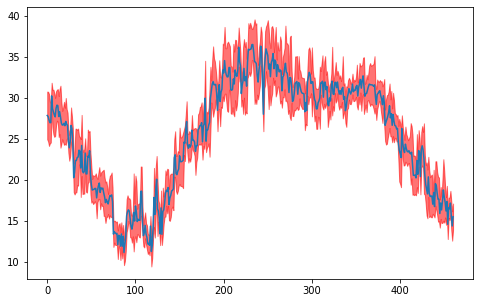

In [49]:
X_val_est = np.vstack(list_predictions).T #has shape=(N_test, n_estimator), with n_estimator>100
from scipy.stats import norm
interv_val = []
for n in range(X_val.shape[0]):
    low, up = norm.interval(0.95, loc=np.mean(X_val_est[n]), scale=np.std(X_val_est[n]))
    interv_val.append([low,up])
interv_val = np.asarray(interv_val)
x = np.arange(X_val_est.shape[0])
plt.figure(figsize=(8,5))
plt.plot(x, np.mean(X_val_est, axis=1))
plt.fill_between(x, interv_val[:,0], interv_val[:,1], color='r', alpha=.55)
plt.show()

j) Evalúe y visualice la predicción del mejor modelo encontrado para resolver este problema, en el conjunto de pruebas. Además, compare y analice las distintas maneras con las que se resolvió el problema, incluya las decisiones que conlleva y los resultados que reflejan.

#### Trabajamos los datos de test al igual que hicimos con los de training

In [50]:
df = pd.read_csv("DailyDelhiClimateTest.csv")

df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row


...#procesamiento de fecha(datetime/timestamp) a numeros

df['date'] = pd.to_datetime(df['date'])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
...#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
... #any more information?
df.drop(["date"], axis=1, inplace=True) #delete date
df['season_fall'] = 0
df['season_rainy'] = 0
print(df)

y_test = df.pop('y_value').values
X_test = df.values 



      meantemp   humidity  wind_speed  meanpressure    y_value  cday  year  \
0    15.913043  85.869565    2.743478     59.000000  18.500000     6  2017   
1    18.500000  77.222222    2.894444   1018.277778  17.111111     0  2017   
2    17.111111  81.888889    4.016667   1018.333333  18.700000     1  2017   
3    18.700000  70.050000    4.545000   1015.700000  18.388889     2  2017   
4    18.388889  74.944444    3.300000   1014.333333  19.318182     3  2017   
..         ...        ...         ...           ...        ...   ...   ...   
108  33.500000  24.125000    9.025000   1000.875000  34.500000     2  2017   
109  34.500000  27.500000    5.562500    998.625000  34.250000     3  2017   
110  34.250000  39.375000    6.962500    999.875000  32.900000     4  2017   
111  32.900000  40.900000    8.890000   1001.600000  32.875000     5  2017   
112  32.875000  27.500000    9.962500   1002.125000  32.000000     6  2017   

     month  season_summer  season_winter  season_fall  season_r

In [51]:
y_predicted_BR_model = BR_model.predict(X_test)
print("Final RMSE BR_model:", RMSE(y_test, y_predicted_BR_model))
list_estimators = BR_model.estimators_
list_predictions = [estimator.predict(X_test) for estimator in list_estimators]
RMSE_quartile = []

for i in range(1,100):
    new_predictions = combine_predictions_quartile(list_predictions, i)
    RMSE_quartile.append(RMSE(y_test, new_predictions))
    #print(i, "RMSE val= ", RMSE(y_test, new_predictions))
    
print("Final optimized RMSE BR_model:", np.min(RMSE_quartile)) 




Final RMSE BR_model: 1.6918530742922824
Final optimized RMSE BR_model: 1.688213701777729


In [52]:
y_predicted_RFR_model_r = RFR_model_r.predict(X_test)
print("Final RMSE RFR_model_r:", RMSE(y_test, y_predicted_RFR_model_r))
list_estimators = RFR_model_r.estimators_
list_predictions = [estimator.predict(X_test) for estimator in list_estimators]
RMSE_quartile = []

for i in range(1,100):
    new_predictions = combine_predictions_quartile(list_predictions, i)
    RMSE_quartile.append(RMSE(y_test, new_predictions))
    #print(i, "RMSE val= ", RMSE(y_test, new_predictions))
    
print("Final optimized RMSE RFR_model_r:", np.min(RMSE_quartile)) 

Final RMSE RFR_model_r: 1.6918620818026762
Final optimized RMSE RFR_model_r: 1.6900378552967856


In [53]:
y_predicted_AR_model = AR_model.predict(X_test)
print("Final RMSE AR_model:", RMSE(y_test, y_predicted_AR_model))
list_estimators = AR_model.estimators_
list_predictions = [estimator.predict(X_test) for estimator in list_estimators]
RMSE_quartile = []

for i in range(1,100):
    new_predictions = combine_predictions_quartile(list_predictions, i)
    RMSE_quartile.append(RMSE(y_test, new_predictions))
    #print(i, "RMSE val= ", RMSE(y_test, new_predictions))
    
print("Final optimized RMSE AR_model:", np.min(RMSE_quartile)) 

Final RMSE AR_model: 1.7672001691624908
Final optimized RMSE AR_model: 1.7086187505255828


## 2. Detección de acoso en *Twitter*
---
En las redes sociales muchas veces se encuentra con un cierto comportamiento indeseable para los usuarios, tal como racismo, misógeno, grupos de odio o *trolls*. El poder detectar de manera automática ciertos patrones en el comportamiento para tomar una acción debe ser crucial para reducir el tiempo y esfuerzo humano. En esta actividad se trabajará sobre *tweets* la red social de *twitter* para detectar comportamiento *online* de acoso (*harassment*), que por lo general, incluye *flaming* como lenguaje abusivo o insultos, *doxing* como mostrar la información personal de una mujer, por ejemplo el domicilio o número de teléfono, la suplantación o la vergüenza pública por destruir la reputación de las personas.

<img src="https://kidshelpline.com.au/sites/default/files/bdl_image/header-T-OH.png" title="Title text" width="45%"  />

En algunos problemas como este, el comportamiento a detectar puede ser asociado a una anomalía (*outlier*) del comportamiento normal de los usuarios en las redes sociales. Esto es una de las causas de la dificultad del problema, puesto que es **altamente desbalanceado**, donde aproximadamente un 10% de los *tweets* corresponden a acoso (*harassment*).

Los datos trabajados corresponderan a *tweets* etiquetados como *harassment* (con valor 1) o no (con valor 0) -- la tarea a detectar--. Además si desea utilizar, se incluye la información del tipo de *harassment* en el conjunto de entrenamiento como atributos extras. El conjunto de pruebas solo contiene los *tweets* a ser etiquetados.


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from  sklearn.metrics import f1_score

In [5]:
#tweet_content, IndirectH, PhysicalH, SexualH

df = pd.read_csv("Train_data.csv")
df1 = pd.read_csv("Test_input.csv")



y_train = df.pop("harassment").values

df.pop("id")



texts_train = df.pop("tweet_content").values
texts_test = df1.pop("tweet_content").values


tfidf_model = TfidfVectorizer(max_features=2500, binary=True, ngram_range=(1, 1), max_df=0.8, min_df=7, norm='l2', stop_words=stopwords.words('english'))
tfidf_model.fit(texts_train)

X_train = tfidf_model.transform(texts_train)
X_test = tfidf_model.transform(texts_test)


#X_train = df.values

##############################################  SPLIT  ##############################################

from sklearn.model_selection import train_test_split
sub_X_train, X_val, sub_y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state=0)

from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier(n_estimators = 1000)
RFC_model.fit(sub_X_train,sub_y_train)

y_pred = RFC_model.predict(X_val)

print("RFC_model score: ", f1_score(y_val, y_pred, average='binary'))

RFC_model score:  0.35064935064935066
